In [7]:
import pandas as pd
import numpy as np
import yaml
import re
from pathlib import Path
import matplotlib.pyplot as plt


In [8]:
# ---config---
config = {
    "input_file": r"C:\\Users\\Vishnu\Desktop\\data_cleaning_prod\\Data_files\\SATARA_1991.csv",
    "output_dir": "output",
    "columns" : {
        "total_persons" : "Total population - Persons",
        "total_males" : "Total population - Males",
        "total_females" : "Total population - Females"
    }
    
}
# create folder if not exist
#Path(config["output_dir"]).mkdir(exist_ok = True, parents = True)


In [16]:
# -- Extract --

file_path = Path(config["input_file"])
df = pd.read_csv(file_path, low_memory = False)

print(f" Data Loaded: {df.shape[0]} rows × {df.shape[1]} cols")
df.head(10)

 Data Loaded: 25 rows × 25 cols


,India/State/UT/CITY/U.A. Name,Age group,Total population - Persons,Total population - Males,Total population - Females,Illiterate - Males,Illiterate - Females,Literate without Educational Level - Non formal - Males,Literate without Educational Level - Non formal - Females,Literate without Educational Level - formal - Males,...,Educational Level - Matriculation/Secondary - Males,Educational Level - Matriculation/Secondary - Females,Educational Level - Higher Secondary/Intermediate/Pre-University/Senior Secondary - Males,Educational Level - Higher Secondary/Intermediate/Pre-University/Senior Secondary - Females,Educational Level - Non-Technical Diploma or certificate not equal to Degree - Males,Educational Level - Non-Technical Diploma or certificate not equal to Degree - Females,Educational Level - Technical Diploma or Certificate not equal to Degree - Males,Educational Level - Technical Diploma or Certificate not equal to Degree - Females,Educational Level - Graduate and above - Males,Educational Level - Graduate and above - Females
0,SATARA,All ages,2451372,1208375,1242997,399253,682640,2280,1730,141280,...,131799,59470,39761,12710,970,530,9310,2670,40925,12980
1,SATARA,0-6,397183,204586,192597,204586,192597,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SATARA,7,53720,27090,26630,6090,8070,190,150,20810,...,0,0,0,0,0,0,0,0,0,0
3,SATARA,8,59270,30570,28700,3610,5060,90,180,26870,...,0,0,0,0,0,0,0,0,0,0
4,SATARA,9,57180,28830,28350,1680,3760,130,60,18990,...,0,0,0,0,0,0,0,0,0,0
5,SATARA,10,70610,36400,34210,2190,5210,60,10,11790,...,0,0,0,0,0,0,0,0,0,0
6,SATARA,11,49700,26650,23050,860,2220,50,50,2760,...,0,0,0,0,0,0,0,0,0,0
7,SATARA,12,67560,35030,32530,1980,4520,40,20,2340,...,0,0,0,0,0,0,0,0,0,0
8,SATARA,13,49800,26310,23490,1000,2490,30,50,910,...,0,0,0,0,0,0,0,0,0,0
9,SATARA,14,52590,28080,24510,1110,2540,10,50,750,...,1100,720,80,30,30,30,0,0,0,0


In [17]:
#  Transform - clean & Feature Engineerimg
#  Function to clean column names

def clean_col_names(col):
    return [re.sub(r"[ /-]+","_", c.strip().lower()) for c in col]           

df.columns = clean_col_names(df.columns)

# Rename columns based on config
cols = config["columns"]
df["total_persons"] = df[clean_col_names([cols["total_persons"]])[0]]
df["total_males"] = df[clean_col_names([cols["total_males"]])[0]]
df["total_females"] = df[clean_col_names([cols["total_females"]])[0]]

# Derive new metrics

illiterate_cols = [c for c in df.columns if "illiterate" in c]

if illiterate_cols:
    df["illiterate_total"] = df[illiterate_cols].sum(axis=1)
    df["approx_literate_total"] = df["total_persons"] - df["illiterate_total"]
    df["approx_literacy_rate_pct"] = (
        df["approx_literate_total"] / df ["total_persons"] * 100).round(2)

df["sex_ratio_f_per_1000_m"] = (
    df["total_females"] / df['total_males'] * 1000).round(2)

print("Transformation complete.")

    

Transformation complete.


In [18]:
df.head()

,india_state_ut_city_u.a._name,age_group,total_population_persons,total_population_males,total_population_females,illiterate_males,illiterate_females,literate_without_educational_level_non_formal_males,literate_without_educational_level_non_formal_females,literate_without_educational_level_formal_males,...,educational_level_technical_diploma_or_certificate_not_equal_to_degree_females,educational_level_graduate_and_above_males,educational_level_graduate_and_above_females,total_persons,total_males,total_females,illiterate_total,approx_literate_total,approx_literacy_rate_pct,sex_ratio_f_per_1000_m
0,SATARA,All ages,2451372,1208375,1242997,399253,682640,2280,1730,141280,...,2670,40925,12980,2451372,1208375,1242997,1081893,1369479,55.87,1028.65
1,SATARA,0-6,397183,204586,192597,204586,192597,0,0,0,...,0,0,0,397183,204586,192597,397183,0,0.00,941.40
2,SATARA,7,53720,27090,26630,6090,8070,190,150,20810,...,0,0,0,53720,27090,26630,14160,39560,73.64,983.02
3,SATARA,8,59270,30570,28700,3610,5060,90,180,26870,...,0,0,0,59270,30570,28700,8670,50600,85.37,938.83
4,SATARA,9,57180,28830,28350,1680,3760,130,60,18990,...,0,0,0,57180,28830,28350,5440,51740,90.49,983.35


In [19]:
# -- load --

csv_out = Path(config["output_dir"]) / "SATARA_1991_enriched.csv"
pq_out = Path(config["output_dir"]) / "SATARA_1991_enriched.parquet"

df.to_csv(csv_out, index = False)
df.to_parquet(pq_out, index = False)

print(f"saved cleaned data to :\n {csv_out}\n {pq_out}")

saved cleaned data to :
 output\SATARA_1991_enriched.csv
 output\SATARA_1991_enriched.parquet


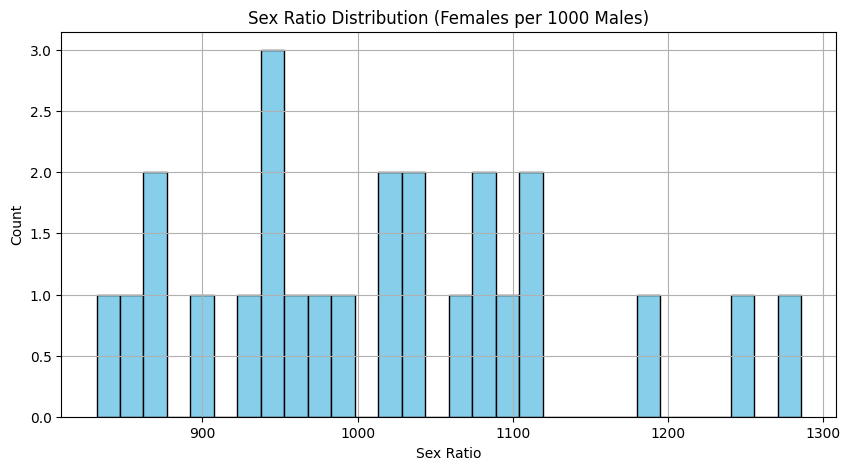

In [20]:
# --- Visualize ---
plt.figure(figsize=(10,5))
plt.hist(df["sex_ratio_f_per_1000_m"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Sex Ratio Distribution (Females per 1000 Males)")
plt.xlabel("Sex Ratio")
plt.ylabel("Count")
plt.grid(True)
plt.show()


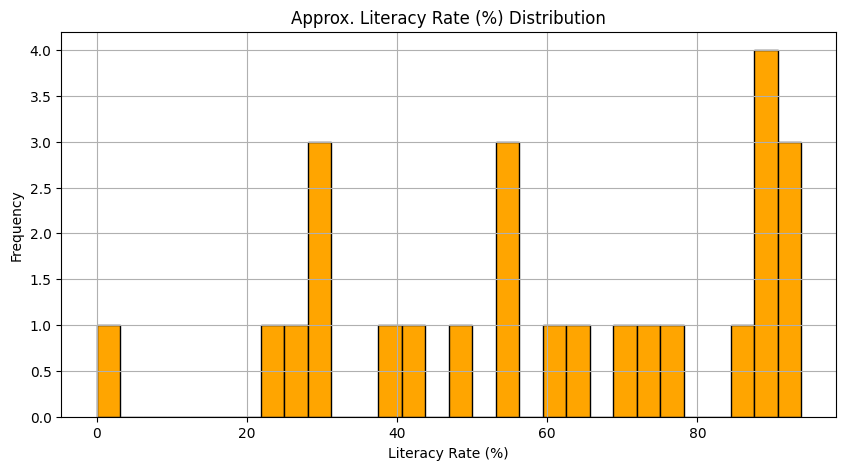

In [21]:
# Literacy Rate Visualization
if "approx_literacy_rate_pct" in df.columns:
    df["approx_literacy_rate_pct"].hist(bins=30, figsize=(10,5), color='orange', edgecolor='black')
    plt.title("Approx. Literacy Rate (%) Distribution")
    plt.xlabel("Literacy Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


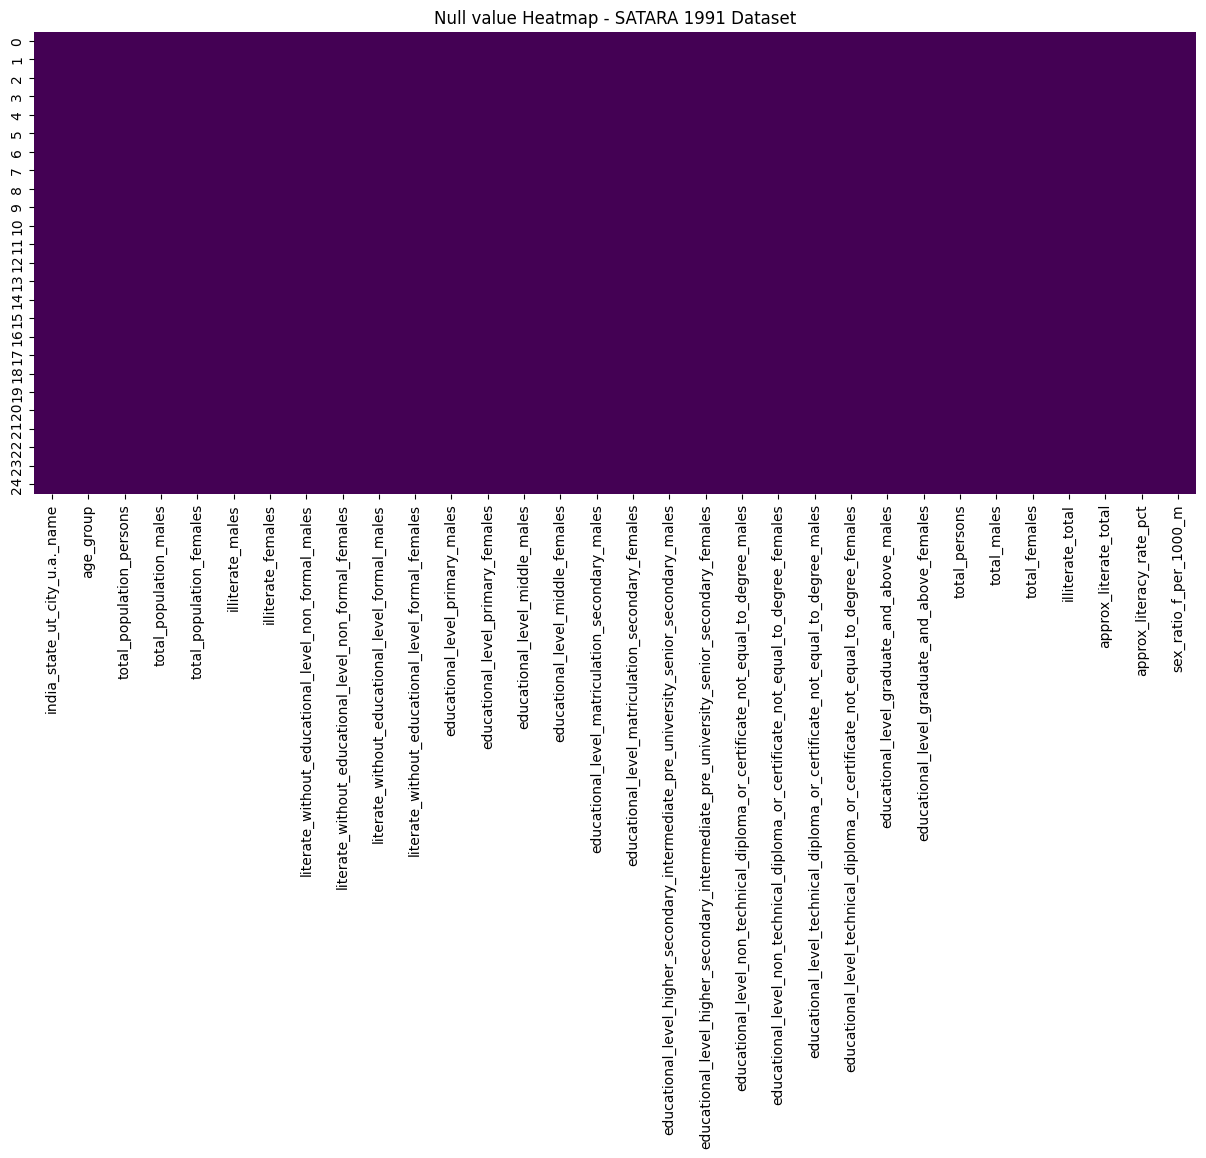

,column,null_count,null_%


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), cbar= False, cmap="viridis")
plt.title("Null value Heatmap - SATARA 1991 Dataset")
plt.show()

#null summary
null_summary = (
    df.isnull().sum().reset_index().rename(columns ={"index":"column", 0:"null_count"})
)
null_summary["null_%"] = (df.isnull().mean() * 100).round(2).values
null_summary = null_summary[null_summary["null_count"] > 0]
display(null_summary.head(20))

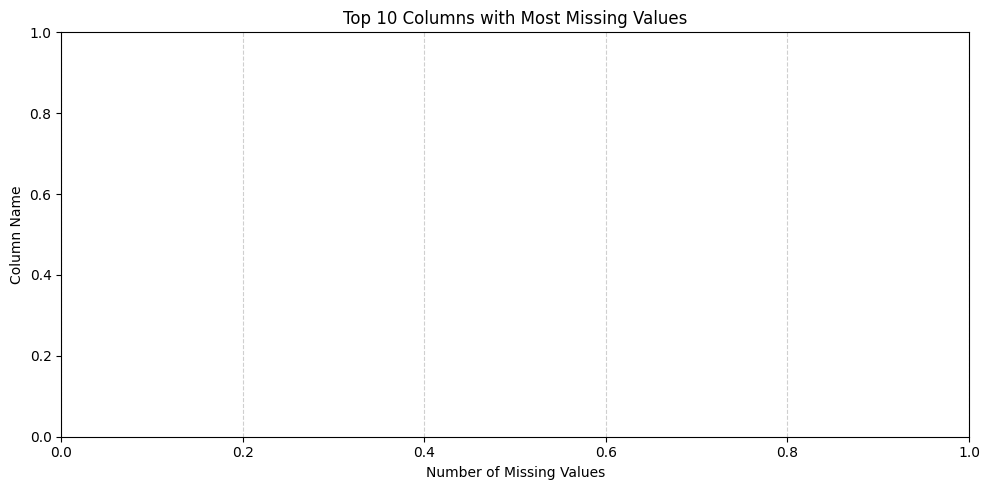

In [26]:
# --- Top 10 Columns with Most Nulls ---
top_nulls = null_summary.sort_values("null_count", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_nulls,
    x="null_count",
    y="column",
    palette="magma"
)
plt.title("Top 10 Columns with Most Missing Values")
plt.xlabel("Number of Missing Values")
plt.ylabel("Column Name")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



C:\Users\Vishnu\AppData\Local\Temp\ipykernel_15088\1623347873.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


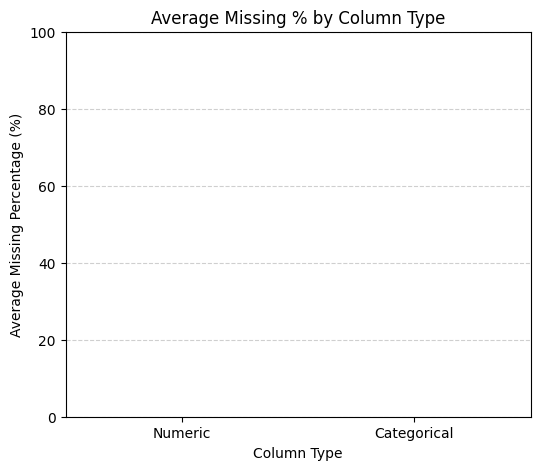

🧮 Average Missing in Numeric Columns: 0.00%
🧾 Average Missing in Categorical Columns: 0.00%


In [27]:
# --- Compare Missing % by Column Type ---

# Identify column types
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Calculate missing percentages
missing_numeric = df[numeric_cols].isnull().mean().mean() * 100
missing_categorical = df[categorical_cols].isnull().mean().mean() * 100

# Prepare data for plotting
missing_type_df = pd.DataFrame({
    "column_type": ["Numeric", "Categorical"],
    "missing_percent": [missing_numeric, missing_categorical]
})

# Plot comparison
plt.figure(figsize=(6,5))
sns.barplot(
    data=missing_type_df,
    x="column_type",
    y="missing_percent",
    palette="coolwarm"
)
plt.title("Average Missing % by Column Type")
plt.ylabel("Average Missing Percentage (%)")
plt.xlabel("Column Type")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print quick summary
print(f"🧮 Average Missing in Numeric Columns: {missing_numeric:.2f}%")
print(f"🧾 Average Missing in Categorical Columns: {missing_categorical:.2f}%")

